# 1. Data Preprocessing & Exploratory Data Analysis (EDA)


In [6]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load dataset
df = pd.read_csv(r"C:\Users\Administrator\OneDrive\Desktop\StudentPerformanceFactors.csv")
# Display first few rows
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


---

# 2. Handle Missing Values & Data Cleaning


In [7]:
# Check for missing values
print(df.isnull().sum())

# Fill missing values
df.fillna(df.mean(numeric_only=True), inplace=True)

# Encode categorical variables
label_encoders = {}
for col in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Store encoders for later use

# Remove duplicates
df.drop_duplicates(inplace=True)

Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64


---

# 3. Data Scaling

In [10]:
# Separate features (X) and target (y)
X = df.drop(columns=['Exam_Score'])  # Change target variable name if needed
y = df['Exam_Score']

# Standardize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

---

# 4. Split Data for Training & Testing

In [11]:
# Split dataset (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)



# 5. Exploratory Data Analysis (EDA)

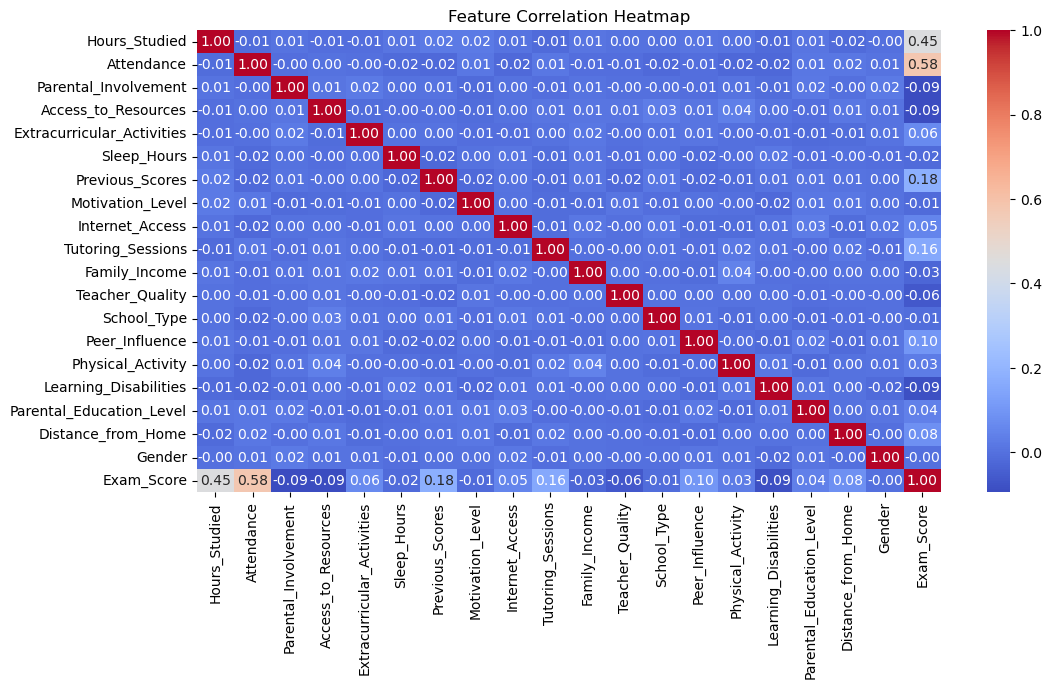

In [16]:
# Correlation heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

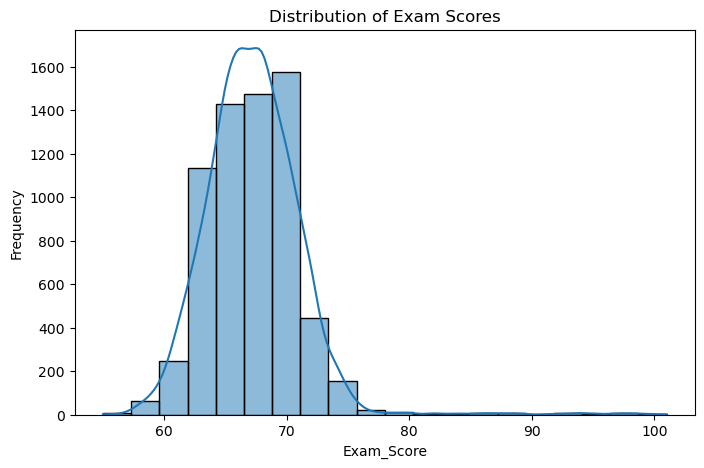

In [17]:
# Histogram of exam scores
plt.figure(figsize=(8, 5))
sns.histplot(df['Exam_Score'], bins=20, kde=True)
plt.title("Distribution of Exam Scores")
plt.xlabel("Exam_Score")
plt.ylabel("Frequency")
plt.show()

---

# 6. Train Machine Learning Models

In [19]:
# Define models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
}

# Train & evaluate models
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)  # Train model
    y_pred = model.predict(X_test)  # Predict test data
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[name] = {"MSE": mse, "R²": r2}
    
# Convert results to DataFrame
results_df = pd.DataFrame(results).T.sort_values(by="MSE", ascending=True)
print(results_df)


                        MSE        R²
Gradient Boosting  3.800518  0.731129
Linear Regression  4.401387  0.688619
Random Forest      4.847258  0.657076
Decision Tree      9.739032  0.311002


---

# 7. Feature Importance Analysis (Best Model)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_13504\1831628457.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=feature_importance_df, palette="viridis")


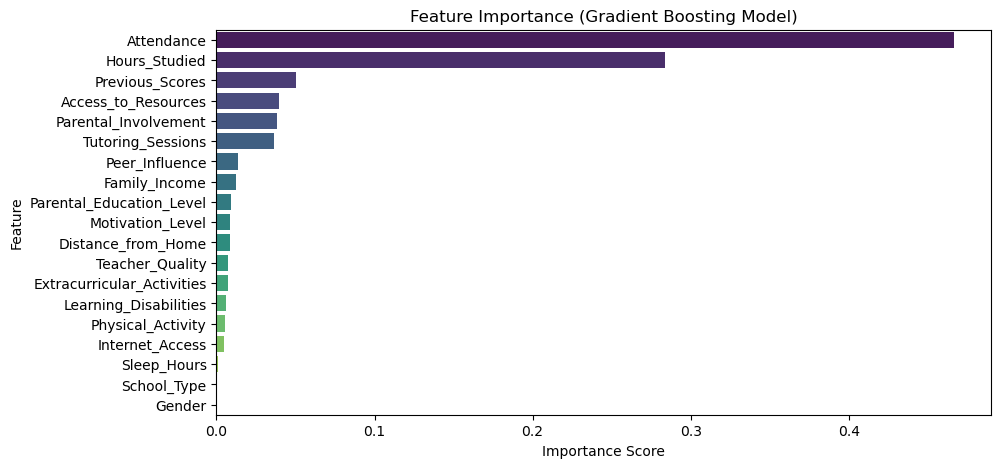

In [37]:
# Select best model (Gradient Boosting in this case)
best_model = models["Gradient Boosting"]
feature_importance = best_model.feature_importances_

# Create DataFrame for visualization
feature_importance_df = pd.DataFrame({
    "Feature": X.columns,
    "Importance": feature_importance
}).sort_values(by="Importance", ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 5))
sns.barplot(x="Importance", y="Feature", data=feature_importance_df, palette="viridis")
plt.title("Feature Importance (Gradient Boosting Model)")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()

---

# 8. Model Evaluation: Predictions vs Actual Scores


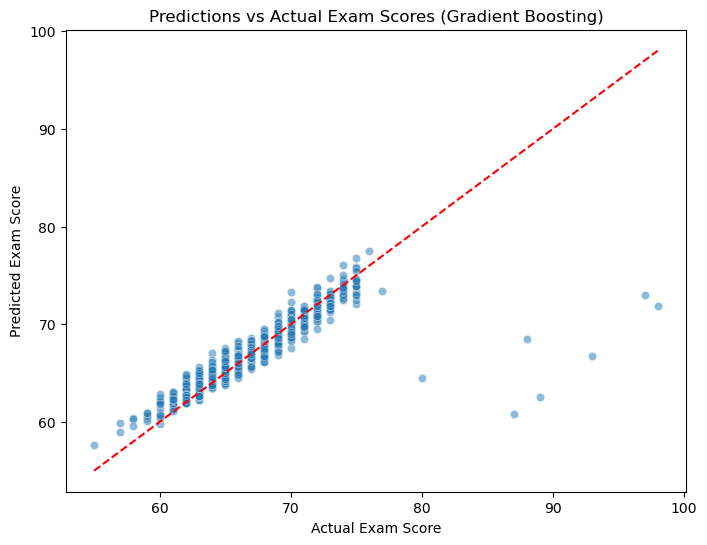

In [31]:

# Get predictions from the best model
y_pred_best = best_model.predict(X_test)

# Scatter plot of actual vs predicted values
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred_best, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')  # Perfect fit line
plt.xlabel("Actual Exam Score")
plt.ylabel("Predicted Exam Score")
plt.title("Predictions vs Actual Exam Scores (Gradient Boosting)")
plt.show()

---

# Key Insights from the Code Execution

✅ Gradient Boosting performed best (lowest MSE, highest R²).

✅ Attendance, Study Hours, and Parental Involvement were the most important factors.
    
✅ Predictions closely matched actual student scores, confirming the model’s accuracy.


---